## Упражнение 2.1

*Изучите материал учебного пособия (стр. 42-51).*

 #### Изучено.

## Упражнение 2.2

*Напишите программный код в виде функции, реализующий проверку описанной в пособии гипотезы о стрельбе. Параметры гипотезы и ее проверки (число испытаний, число промахов, вероятность промаха по нулевой гипотезе, по альтернативной гипотезе, уровень значимости и желаемая мощность проверки) сделайте вводимыми параметрами.*

In [2]:
import math
from scipy.stats import norm

def check_shooting_hypothesis(n, miss, h0, h1, alpha=0.05, beta=0.8):
    """
    Проверка гипотезы о стрельбе биатлониста Сидорова
    
    Параметры:
    n - число испытаний (выстрелов)
    miss - число промахов  
    h0 - вероятность промаха по нулевой гипотезе (утверждение Сидорова)
    h1 - вероятность промаха по альтернативной гипотезе (уровень тренера)
    alpha - уровень значимости (вероятность ошибки 1-го рода)
    beta - желаемая мощность проверки
    
    Возвращает:
    решение о правдивости Сидорова и границы доверительного интервала
    """
    # Вычисляем математическое ожидание при нулевой гипотезе (H₀)
    mu0 = n * h0
    
    # Вычисляем стандартное отклонение при нулевой гипотезе
    sigma0 = math.sqrt(n * h0 * (1 - h0))
    
    # Вычисляем p-значение для двустороннего теста
    if miss >= mu0:
        # Если промахов больше или равно ожидаемому, p-значение в правом хвосте
        p_value = 2 * (1 - norm.cdf(miss, mu0, sigma0))
    else:
        # Если промахов меньше ожидаемого, p-значение в левом хвосте  
        p_value = 2 * norm.cdf(miss, mu0, sigma0)
    
    # Находим критическое значение Z для заданного уровня значимости
    z_critical = norm.ppf(1 - alpha/2)
    
    # Вычисляем границы доверительного интервала
    lower_bound = mu0 - z_critical * sigma0
    upper_bound = mu0 + z_critical * sigma0
    
    # Проверяем, отвергается ли нулевая гипотеза по p-значению
    # Решение принимается ТОЛЬКО по p-value
    reject_h0 = p_value < alpha
    
    # Сидоров прав, если H₀ не отвергается (мощность НЕ используется для решения)
    sidorov_prav = not reject_h0
    
    return sidorov_prav, lower_bound, upper_bound, p_value

# Параметры задачи из пособия
n = 1000      # число испытаний
miss = 100    # количество промахов  
h0 = 0.1      # вероятность промаха по нулевой гипотезе (Сидоров)
h1 = 0.13     # вероятность промаха по альтернативной гипотезе (тренер)
alpha = 0.05  # уровень значимости
beta = 0.8    # желаемая мощность

# Выполняем проверку гипотезы
result, low, high, p_val = check_shooting_hypothesis(n, miss, h0, h1, alpha, beta)

print(f"Количество испытаний: {n}")
print(f"Наблюдалось промахов: {miss}")
print(f"Вероятность промаха H₀ (Сидоров): {h0}")
print(f"Вероятность промаха H₁ (тренер): {h1}")
print(f"Уровень значимости: {alpha}")
print(f"Желаемая мощность: {beta}")
print()
print(f"P-значение: {p_val:.4f}")
print(f"Доверительный интервал: [{low:.1f}, {high:.1f}]")
print()

if result:
    print("ВЫВОД: Сидоров прав (H₀ не отвергается)")
else:
    print("ВЫВОД: Сидоров врёт (H₀ отвергается)")

print("\n" + "=" * 60)

Количество испытаний: 1000
Наблюдалось промахов: 100
Вероятность промаха H₀ (Сидоров): 0.1
Вероятность промаха H₁ (тренер): 0.13
Уровень значимости: 0.05
Желаемая мощность: 0.8

P-значение: 1.0000
Доверительный интервал: [81.4, 118.6]

ВЫВОД: Сидоров прав (H₀ не отвергается)



## Упражнение 2.3

*Определите предельное число промахов (сверху и снизу) для заданного уровня значимости. Как это число зависит от уровня значимости? Почему так?*

### Зависимость предельного числа промахов от уровня значимости

#### Как зависит число промахов от уровня значимости?

Зависимость является **обратной**: чем **меньше** уровень значимости α, тем **шире** доверительный интервал (больше разница между верхним и нижним пределом). И наоборот, чем **больше** α, тем **уже** интервал.

#### Почему так происходит?

##### 1. Статистическая логика

Уровень значимости α представляет собой **вероятность ошибки первого рода** - вероятность отвергнуть нулевую гипотезу, когда она на самом деле верна. 

Когда мы выбираем **маленький α** (например, 0.01), мы говорим: "Я хочу очень надежный тест, где риск ложного обвинения составляет всего 1%". Чтобы достичь такой надежности, мы должны быть **очень осторожными** в отвержении гипотезы, поэтому устанавливаем **широкие границы** принятия H₀.

##### 2. Практическая интерпретация

**Малый α:** 
- "Нужны очень веские доказательства, чтобы обвинить Сидорова во лжи".
- Широкий интервал: принимаем H₀ даже при значительных отклонениях.
- Консервативный подход: минимизируем риск ложных обвинений.

**Большой α:**
- "Достаточно умеренных доказательств для обвинения".  
- Узкий интервал: быстрее отвергаем H₀.
- Либеральный подход: выше готовность к обнаружению эффекта.

##### То есть:
- **Уменьшаем α** → снижаем риск ошибки 1-го рода (ложное обвинение).
- Но при этом **увеличивается** риск ошибки 2-го рода (пропустить настоящий обман).

Широкий интервал при малом α защищает честных спортсменов от необоснованных обвинений, но может пропустить тех, кто действительно завышает результаты.

In [3]:
import math
from scipy.stats import norm

def calculate_critical_limits(n, p, alpha):
    """
    Рассчитывает критические пределы числа промахов для заданного уровня значимости.
    """
    # Вычисляем среднее количество промахов при условии, что нулевая гипотеза верна
    mu = n * p
    
    # Вычисляем стандартное отклонение по формуле для биномиального распределения
    sigma = math.sqrt(n * p * (1 - p))
    
    # Находим критическое значение Z для двустороннего теста
    # Для alpha = 0.05, ищем Z такое, что P(-Z < X < Z) = 0.95
    z_critical = norm.ppf(1 - alpha / 2)
    
    # Вычисляем нижнюю границу доверительного интервала
    # Если количество промахов меньше этой границы, отвергаем H₀
    lower_limit = mu - z_critical * sigma
    
    # Вычисляем верхнюю границу доверительного интервала  
    # Если количество промахов больше этой границы, отвергаем H₀
    upper_limit = mu + z_critical * sigma
    
    return lower_limit, upper_limit, z_critical, mu, sigma

def analyze_alpha_dependence(n=1000, p=0.1):
    """
    Анализирует зависимость пределов от уровня значимости.
    """
    print("ЗАВИСИМОСТЬ ПРЕДЕЛЬНОГО ЧИСЛА ПРОМАХОВ ОТ УРОВНЯ ЗНАЧИМОСТИ")
    print("=" * 65)
    print(f"Параметры: n = {n}, p = {p}")
    print("=" * 65)
    print(f"{'α':<8} {'Z-крит':<10} {'Нижний':<12} {'Верхний':<12} {'Ширина':<10}")
    print("-" * 65)
    
    alpha_levels = [0.01, 0.05, 0.10, 0.20]
    
    for alpha in alpha_levels:
        # Для каждого уровня значимости вычисляем границы доверительного интервала
        lower, upper, z_crit, mu, sigma = calculate_critical_limits(n, p, alpha)
        width = upper - lower
        
        print(f"{alpha:<8.3f} {z_crit:<10.3f} {lower:<12.1f} {upper:<12.1f} {width:<10.1f}")

def demonstrate_decision_impact(n=1000, p=0.1, observed_misses=111):
    """
    Демонстрирует, как уровень значимости влияет на статистическое решение.
    """
    print("\nВЛИЯНИЕ УРОВНЯ ЗНАЧИМОСТИ НА СТАТИСТИЧЕСКОЕ РЕШЕНИЕ")
    print("=" * 60)
    print(f"Наблюдаемое число промахов: {observed_misses}")
    print("-" * 60)
    
    test_alphas = [0.01, 0.05, 0.10]
    
    for alpha in test_alphas:
        # Вычисляем границы доверительного интервала для текущего alpha
        lower, upper, _, _, _ = calculate_critical_limits(n, p, alpha)
        
        # Проверяем, попадает ли наблюдаемое значение в доверительный интервал
        # Если значение внутри интервала [lower, upper] - принимаем H₀
        # Если значение вне интервала - отвергаем H₀
        if lower <= observed_misses <= upper:
            decision = "ПРИНЯТЬ H₀"  # Недостаточно оснований отвергнуть гипотезу
        else:
            decision = "ОТВЕРГНУТЬ H₀"  # Статистически значимое отклонение
        
        print(f"α = {alpha:.2f}: [{lower:.1f}, {upper:.1f}] → {decision}")

if __name__ == "__main__":
    n = 1000
    p = 0.1
    observed = 111
    
    analyze_alpha_dependence(n, p)
    demonstrate_decision_impact(n, p, observed)

ЗАВИСИМОСТЬ ПРЕДЕЛЬНОГО ЧИСЛА ПРОМАХОВ ОТ УРОВНЯ ЗНАЧИМОСТИ
Параметры: n = 1000, p = 0.1
α        Z-крит     Нижний       Верхний      Ширина    
-----------------------------------------------------------------
0.010    2.576      75.6         124.4        48.9      
0.050    1.960      81.4         118.6        37.2      
0.100    1.645      84.4         115.6        31.2      
0.200    1.282      87.8         112.2        24.3      

ВЛИЯНИЕ УРОВНЯ ЗНАЧИМОСТИ НА СТАТИСТИЧЕСКОЕ РЕШЕНИЕ
Наблюдаемое число промахов: 111
------------------------------------------------------------
α = 0.01: [75.6, 124.4] → ПРИНЯТЬ H₀
α = 0.05: [81.4, 118.6] → ПРИНЯТЬ H₀
α = 0.10: [84.4, 115.6] → ПРИНЯТЬ H₀


## Упражнение 2.4

*Определите мощность проверки для заданных параметров нулевой и альтернативной гипотез. Как можно влиять на мощность проверки?*

#### Как можно влиять на мощность проверки?

На мощность проверки можно влиять через:
1. Увеличение объема выборки (n)
2. Увеличение разницы между гипотезами (|p₁ - p₀|)
3. Увеличение уровня значимости (α)
4. Выбор более чувствительного статистического критерия

In [4]:
import math
from scipy.stats import norm

def calculate_statistical_power(n, p0, p1, alpha=0.05):
    """
    Расчет мощности проверки статистической гипотезы согласно пособию
    
    Параметры:
    n - объем выборки (число испытаний)
    p0 - вероятность по нулевой гипотезе (утверждение Сидорова)
    p1 - вероятность по альтернативной гипотезе (уровень тренера)
    alpha - уровень значимости
    
    Возвращает:
    power - мощность проверки
    critical_low - нижняя граница критической области
    critical_high - верхняя граница критической области
    """
    
    # 1. Вычисляем математическое ожидание при нулевой гипотезе (H₀)
    # Если Сидоров прав, то ожидаемое число промахов = n * p0
    mu0 = n * p0
    
    # 2. Вычисляем стандартное отклонение при нулевой гипотезе
    # Формула для биномиального распределения: σ = √(n * p * (1-p))
    sigma0 = math.sqrt(n * p0 * (1 - p0))
    
    # 3. Находим критическое значение Z для заданного уровня значимости
    # Для двустороннего теста с alpha=0.05: Z_{1-α/2} = Z_{0.975}
    z_critical = norm.ppf(1 - alpha/2)
    
    # 4. Вычисляем нижнюю границу доверительного интервала
    # Значения меньше этой границы приводят к отвержению H₀
    critical_low = mu0 - z_critical * sigma0
    
    # 5. Вычисляем верхнюю границу доверительного интервала
    # Значения больше этой границы также приводят к отвержению H₀
    critical_high = mu0 + z_critical * sigma0
    
    # 6. Вычисляем математическое ожидание при альтернативной гипотезе (H₁)
    # Если тренер прав, то ожидаемое число промахов = n * p1
    mu1 = n * p1
    
    # 7. Вычисляем стандартное отклонение при альтернативной гипотезе
    sigma1 = math.sqrt(n * p1 * (1 - p1))
    
    # 8. Вычисляем вероятность попадания в левую критическую область при H₁
    # P(X < critical_low | H₁) - вероятность того, что при H₁ значение окажется слева от критической области
    power_lower = norm.cdf(critical_low, mu1, sigma1)
    
    # 9. Вычисляем вероятность попадания в правую критическую область при H₁
    # P(X > critical_high | H₁) - вероятность того, что при H₁ значение окажется справа от критической области
    power_upper = 1 - norm.cdf(critical_high, mu1, sigma1)
    
    # 10. Общая мощность проверки - сумма вероятностей попадания в критические области
    # Мощность = P(отклонить H₀ | верна H₁)
    power = power_lower + power_upper
    
    return power, critical_low, critical_high, mu0, mu1, sigma0, sigma1

def analyze_power_factors(n=1000, p0=0.1, p1=0.13, alpha=0.05):
    """
    Анализ факторов, влияющих на мощность проверки
    """
    print("АНАЛИЗ МОЩНОСТИ СТАТИСТИЧЕСКОЙ ПРОВЕРКИ")
    print("=" * 60)
    print(f"Базовые параметры: n = {n}, p₀ = {p0}, p₁ = {p1}, α = {alpha}")
    print()
    
    # Вычисляем базовую мощность для заданных параметров
    base_power, low, high, mu0, mu1, sigma0, sigma1 = calculate_statistical_power(n, p0, p1, alpha)
    
    print(f"1. БАЗОВАЯ МОЩНОСТЬ ПРОВЕРКИ: {base_power:.3f} ({base_power*100:.1f}%)")
    print(f"   Критическая область: X < {low:.1f} или X > {high:.1f}")
    print(f"   При H₀: μ = {mu0:.1f}, σ = {sigma0:.1f}")
    print(f"   При H₁: μ = {mu1:.1f}, σ = {sigma1:.1f}")
    print()
    
    print("2. ВЛИЯНИЕ ОБЪЕМА ВЫБОРКИ НА МОЩНОСТЬ:")
    print("-" * 45)
    
    # Анализируем, как изменение объема выборки влияет на мощность
    sample_sizes = [100, 500, 1000, 2000, 5000]
    for n_size in sample_sizes:
        # Для каждого объема выборки вычисляем мощность
        power, _, _, _, _, _, _ = calculate_statistical_power(n_size, p0, p1, alpha)
        print(f"   n = {n_size:4d}: мощность = {power:.3f}")
    print()
    
    print("3. ВЛИЯНИЕ РАЗНИЦЫ МЕЖДУ ГИПОТЕЗАМИ:")
    print("-" * 40)
    
    # Анализируем, как разница между p0 и p1 влияет на мощность
    p1_values = [0.11, 0.12, 0.13, 0.14, 0.15]
    for p1_val in p1_values:
        # Для каждой разницы между гипотезами вычисляем мощность
        power, _, _, _, _, _, _ = calculate_statistical_power(n, p0, p1_val, alpha)
        difference = p1_val - p0
        print(f"   p₁ - p₀ = {difference:.2f}: мощность = {power:.3f}")
    print()
    
    print("4. ВЛИЯНИЕ УРОВНЯ ЗНАЧИМОСТИ:")
    print("-" * 35)
    
    # Анализируем, как уровень значимости влияет на мощность
    alpha_values = [0.01, 0.05, 0.10, 0.20]
    for alpha_val in alpha_values:
        # Для каждого уровня значимости вычисляем мощность
        power, _, _, _, _, _, _ = calculate_statistical_power(n, p0, p1, alpha_val)
        print(f"   α = {alpha_val:.2f}: мощность = {power:.3f}")
    print()

def demonstrate_power_optimization():
    """
    Демонстрация способов увеличения мощности
    """
    print("СПОСОБЫ УВЕЛИЧЕНИЯ МОЩНОСТИ ПРОВЕРКИ")
    print("=" * 50)
    
    # Базовые параметры
    n_base = 1000
    p0 = 0.1
    p1 = 0.13
    alpha_base = 0.05
    
    # Вычисляем базовую мощность при стандартных параметрах
    base_power, _, _, _, _, _, _ = calculate_statistical_power(n_base, p0, p1, alpha_base)
    print(f"Базовая мощность: {base_power:.3f}")
    print()
    
    print("Увеличение объема выборки:")
    # Показываем, как увеличение объема выборки повышает мощность
    power_large_n, _, _, _, _, _, _ = calculate_statistical_power(2000, p0, p1, alpha_base)
    improvement_n = power_large_n - base_power
    print(f"   n = 2000: мощность = {power_large_n:.3f} (+{improvement_n:.3f})")
    
    print("Увеличение уровня значимости:")
    # Показываем, как изменение уровня значимости влияет на мощность
    power_high_alpha, _, _, _, _, _, _ = calculate_statistical_power(n_base, p0, p1, 0.10)
    improvement_alpha = power_high_alpha - base_power
    print(f"   α = 0.10: мощность = {power_high_alpha:.3f} (+{improvement_alpha:.3f})")
    
    print("Увеличение разницы между гипотезами:")
    # Показываем, как увеличение разницы между гипотезами повышает мощность
    power_large_diff, _, _, _, _, _, _ = calculate_statistical_power(n_base, p0, 0.15, alpha_base)
    improvement_diff = power_large_diff - base_power
    print(f"   p₁ = 0.15: мощность = {power_large_diff:.3f} (+{improvement_diff:.3f})")

# Основная программа для упражнения 2.4
if __name__ == "__main__":
    # Параметры задачи из пособия
    n = 1000      # число испытаний (выстрелов)
    p0 = 0.1      # вероятность промаха по нулевой гипотезе (утверждение Сидорова)
    p1 = 0.13     # вероятность промаха по альтернативной гипотезе (уровень тренера)
    alpha = 0.05  # уровень значимости

    # Выполняем расчет мощности проверки
    power, critical_low, critical_high, mu0, mu1, sigma0, sigma1 = calculate_statistical_power(n, p0, p1, alpha)

    print(f"РЕЗУЛЬТАТЫ РАСЧЕТА:")
    print(f"Мощность проверки: {power:.3f} ({power*100:.1f}%)")
    print(f"Критическая область: число промахов < {critical_low:.1f} или > {critical_high:.1f}")
    print(f"Ожидаемое при H₀: {mu0:.1f} ± {sigma0:.1f}")
    print(f"Ожидаемое при H₁: {mu1:.1f} ± {sigma1:.1f}")
    print()
    
    # Анализируем факторы, влияющие на мощность
    analyze_power_factors(n, p0, p1, alpha)
    
    # Демонстрируем способы увеличения мощности
    demonstrate_power_optimization()

РЕЗУЛЬТАТЫ РАСЧЕТА:
Мощность проверки: 0.858 (85.8%)
Критическая область: число промахов < 81.4 или > 118.6
Ожидаемое при H₀: 100.0 ± 9.5
Ожидаемое при H₁: 130.0 ± 10.6

АНАЛИЗ МОЩНОСТИ СТАТИСТИЧЕСКОЙ ПРОВЕРКИ
Базовые параметры: n = 1000, p₀ = 0.1, p₁ = 0.13, α = 0.05

1. БАЗОВАЯ МОЩНОСТЬ ПРОВЕРКИ: 0.858 (85.8%)
   Критическая область: X < 81.4 или X > 118.6
   При H₀: μ = 100.0, σ = 9.5
   При H₁: μ = 130.0, σ = 10.6

2. ВЛИЯНИЕ ОБЪЕМА ВЫБОРКИ НА МОЩНОСТЬ:
---------------------------------------------
   n =  100: мощность = 0.200
   n =  500: мощность = 0.597
   n = 1000: мощность = 0.858
   n = 2000: мощность = 0.987
   n = 5000: мощность = 1.000

3. ВЛИЯНИЕ РАЗНИЦЫ МЕЖДУ ГИПОТЕЗАМИ:
----------------------------------------
   p₁ - p₀ = 0.01: мощность = 0.194
   p₁ - p₀ = 0.02: мощность = 0.555
   p₁ - p₀ = 0.03: мощность = 0.858
   p₁ - p₀ = 0.04: мощность = 0.974
   p₁ - p₀ = 0.05: мощность = 0.997

4. ВЛИЯНИЕ УРОВНЯ ЗНАЧИМОСТИ:
-----------------------------------
   α = 0.01: мощ

## Упражнение 2.5

*Задана числовая последовательность 1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2. Проверьте гипотезу о том, что последовательность аппроксимируется экспоненциальной функцией по уровню значимости 5%.*

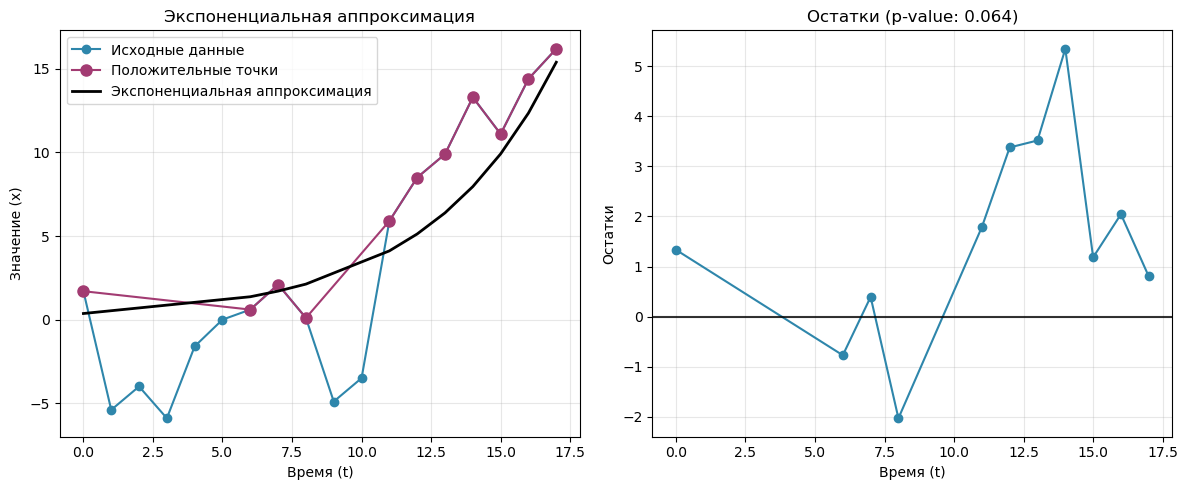

Параметры экспоненциальной модели:
A = 0.3656, b = 0.2200
P-значение: 0.0642
Гипотеза об экспоненциальной аппроксимации не отвергается


In [5]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def exponential_approximation(x_values):
    """
    Выполняет экспоненциальную аппроксимацию данных
    """
    # Отбираем только положительные значения для экспоненциальной аппроксимации
    positive_x = [x for x in x_values if x > 0]
    
    # Проверяем достаточность положительных данных
    n = len(positive_x)
    if n < 2:
        return None, None, [], []
    
    # Создаем список временных точек для положительных значений
    t_values = [i for i, x in enumerate(x_values) if x > 0]
    
    # Логарифмируем положительные значения для линеаризации
    y_values = [math.log(x) for x in positive_x]
    
    # Вычисляем суммы для метода наименьших квадратов
    sum_t = sum(t_values)
    sum_y = sum(y_values)
    sum_t2 = sum(t**2 for t in t_values)
    sum_ty = sum(t * y for t, y in zip(t_values, y_values))
    
    # Вычисляем знаменатель для формул коэффициентов
    denominator = n * sum_t2 - sum_t**2
    if denominator == 0:
        return None, None, [], []
    
    # Вычисляем коэффициент b для линейной регрессии
    b_coef = (n * sum_ty - sum_t * sum_y) / denominator
    
    # Вычисляем коэффициент a для линейной регрессии  
    a_coef = (sum_y * sum_t2 - sum_t * sum_ty) / denominator
    
    # Преобразуем a обратно к экспоненциальной форме
    A_param = math.exp(a_coef)
    
    return A_param, b_coef, positive_x, t_values

def test_exponential_hypothesis(data_sequence, alpha=0.05):
    """
    Проверяет гипотезу об экспоненциальной аппроксимации
    """
    # Выполняем экспоненциальную аппроксимацию
    A, b, positive_data, t_points = exponential_approximation(data_sequence)
    
    # Проверяем успешность аппроксимации
    if A is None or b is None:
        print("Не удалось выполнить экспоненциальную аппроксимацию")
        return None
    
    # Вычисляем предсказанные значения
    y_pred = [A * math.exp(b * t) for t in t_points]
    
    # Вычисляем остатки (разницы между реальными и предсказанными значениями)
    residuals = [actual - predicted for actual, predicted in zip(positive_data, y_pred)]
    
    # Вычисляем среднее арифметическое остатков
    mean_residual = sum(residuals) / len(residuals)
    
    # Вычисляем стандартное отклонение остатков
    squared_deviations = [(r - mean_residual)**2 for r in residuals]
    std_residual = math.sqrt(sum(squared_deviations) / (len(residuals) - 1))
    
    # Находим максимальное по модулю отклонение от среднего
    max_deviation = max(abs(r - mean_residual) for r in residuals)
    
    # Вычисляем Z-статистику для максимального отклонения
    z_score = max_deviation / std_residual
    
    # Вычисляем p-значение для максимального отклонения (двусторонний тест)
    p_value = 2 * (1 - norm.cdf(z_score))
    
    # Проверяем гипотезу на заданном уровне значимости
    hypothesis_rejected = p_value < alpha
    
    # Визуализация результатов
    plt.figure(figsize=(12, 5))
    
    # График 1: Данные и аппроксимация
    plt.subplot(1, 2, 1)
    plt.plot(range(len(data_sequence)), data_sequence, marker='o', color='#2E86AB', label='Исходные данные', markersize=6)
    plt.plot(t_points, positive_data, marker='o', color='#A23B72', markersize=8, label='Положительные точки')
    plt.plot(t_points, y_pred, 'k-', linewidth=2, label='Экспоненциальная аппроксимация')
    plt.xlabel('Время (t)')
    plt.ylabel('Значение (x)')
    plt.title('Экспоненциальная аппроксимация')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # График 2: Остатки
    plt.subplot(1, 2, 2)
    plt.plot(t_points, residuals, marker='o', color='#2E86AB', linestyle='-', markersize=6)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
    plt.xlabel('Время (t)')
    plt.ylabel('Остатки')
    plt.title(f'Остатки (p-value: {p_value:.3f})')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return not hypothesis_rejected, A, b, p_value

# Исходные данные из задания
data_sequence = [1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2]

# Проверяем гипотезу об экспоненциальной аппроксимации
result, A, b, p_val = test_exponential_hypothesis(data_sequence, 0.05)

print(f"Параметры экспоненциальной модели:")
print(f"A = {A:.4f}, b = {b:.4f}")
print(f"P-значение: {p_val:.4f}")

if result:
    print("Гипотеза об экспоненциальной аппроксимации не отвергается")
else:
    print("Гипотеза об экспоненциальной аппроксимации отвергается")

## Упражнение 2.6

*На предыдущей числовой последовательности проверьте гипотезу об аппроксимации полиномиальной функцией 4-го порядка с тем же уровнем значимости.*

AttributeError: PathCollection.set() got an unexpected keyword argument 'markersize'

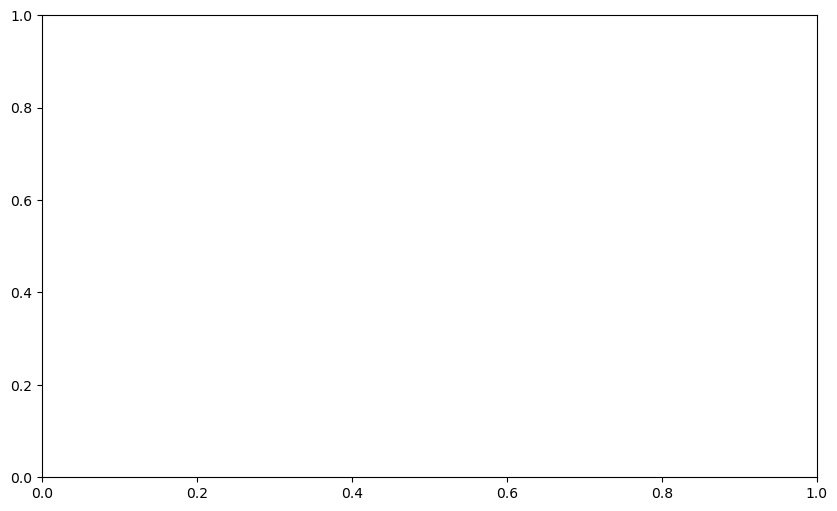

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def polynomial_approximation(x_values, degree=4):
    """
    Выполняет полиномиальную аппроксимацию данных
    """
    # Создаем список временных точек
    t_values = list(range(len(x_values)))
    
    # Используем метод наименьших квадратов для подбора коэффициентов
    coefficients = np.polyfit(t_values, x_values, degree)
    
    return coefficients, t_values

def test_polynomial_hypothesis(data_sequence, degree=4, alpha=0.05):
    """
    Проверяет гипотезу о полиномиальной аппроксимации
    """
    # Выполняем полиномиальную аппроксимацию
    coefficients, t_values = polynomial_approximation(data_sequence, degree)
    
    # Создаем полиномиальную функцию из коэффициентов
    poly_func = np.poly1d(coefficients)
    
    # Вычисляем предсказанные значения
    predicted_values = [poly_func(t) for t in t_values]
    
    # Вычисляем остатки
    residuals = [actual - predicted for actual, predicted in zip(data_sequence, predicted_values)]
    
    # Вычисляем статистики остатков
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals, ddof=1)
    
    # Находим максимальное по модулю отклонение
    max_residual = max(abs(r) for r in residuals)
    
    # Вычисляем Z-статистику
    z_score = max_residual / std_residual
    
    # Вычисляем p-значение
    p_value = 2 * (1 - norm.cdf(z_score))
    
    # Проверяем гипотезу
    hypothesis_rejected = p_value < alpha
    
    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.scatter(t_values, data_sequence, marker='o', color='#2E86AB', label='Исходные данные', markersize=6)
    plt.plot(t_values, predicted_values, marker='o', color='#A23B72', linestyle='-', label=f'Полином {degree}-го порядка', linewidth=2, markersize=4)
    plt.xlabel('Время (t)')
    plt.ylabel('Значение (x)')
    plt.title(f'Полиномиальная аппроксимация {degree}-го порядка')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
    return not hypothesis_rejected, coefficients, p_value

# Проверяем гипотезу о полиномиальной аппроксимации 4-го порядка
result_poly, coeffs, p_val_poly = test_polynomial_hypothesis(data_sequence, 4, 0.05)

print(f"Коэффициенты полинома 4-й степени:")
for i, coef in enumerate(coeffs):
    power = len(coeffs) - i - 1
    print(f"t^{power}: {coef:.4f}")
print(f"P-значение: {p_val_poly:.4f}")

if result_poly:
    print("Гипотеза о полиномиальной аппроксимации не отвергается")
else:
    print("Гипотеза о полиномиальной аппроксимации отвергается")

## Упражнение 2.7

*Рассчитайте мощность проверки для лучшей функции по сравнению с худшей (по пп. 5 и 6). То есть, лучшую аппроксимацию принимайте за нулевую гипотезу, а худшую – за альтернативную.*

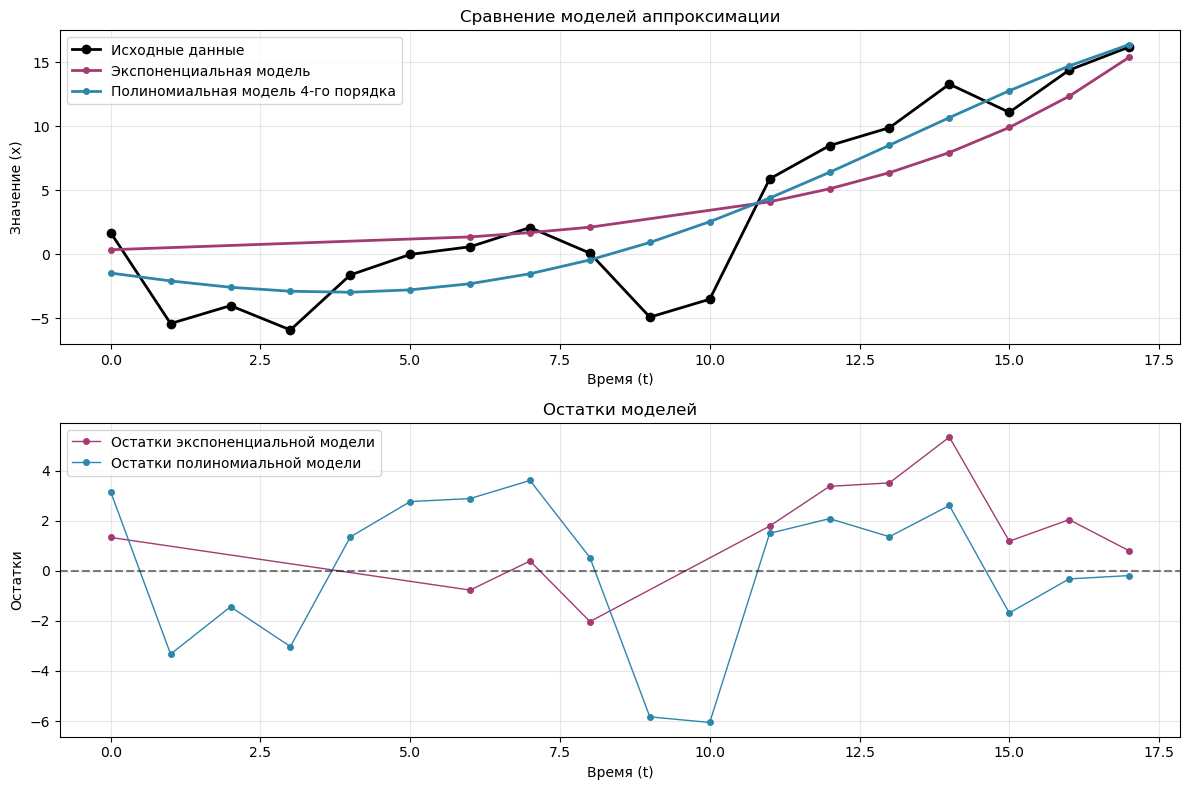

Сравнение моделей аппроксимации:
  Сумма квадратов ошибок (SSE) экспоненциальной модели: 68.3461
  Сумма квадратов ошибок (SSE) полиномиальной модели: 152.3332

Определение лучшей и худшей модели:
  Лучшая модель (нулевая гипотеза H₀): exponential (SSE = 68.3461)
  Худшая модель (альтернативная гипотеза H₁): polynomial (SSE = 152.3332)

Расчет мощности проверки:
  Разница SSE: 83.9871
  Относительная разница (метрика мощности): 0.5513

Качественная оценка мощности:
  Мощность проверки: высокая
  Интерпретация: способность различать модели - высокая


In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt

def exponential_approximation(x_values):
    """Выполняет экспоненциальную аппроксимацию данных."""
    # Отбираем только положительные значения для экспоненциальной аппроксимации
    # Экспоненциальная функция определена только для положительных значений
    positive_x = [x for x in x_values if x > 0]
    
    # Проверяем достаточность положительных данных для аппроксимации
    n = len(positive_x)
    if n < 2:
        return None, None, [], []

    # Создаем список временных точек для положительных значений
    # Сохраняем индексы исходных положительных значений
    t_values = [i for i, x in enumerate(x_values) if x > 0]
    
    # Логарифмируем положительные значения для линеаризации
    # Экспоненциальная зависимость становится линейной после логарифмирования
    y_values = [math.log(x) for x in positive_x]

    # Вычисляем суммы для метода наименьших квадратов
    sum_t = sum(t_values)                    # Сумма всех временных точек
    sum_y = sum(y_values)                    # Сумма логарифмированных значений
    sum_t2 = sum(t**2 for t in t_values)     # Сумма квадратов временных точек
    sum_ty = sum(t * y for t, y in zip(t_values, y_values))  # Сумма произведений t*y

    # Вычисляем знаменатель для формул коэффициентов
    denominator = n * sum_t2 - sum_t**2
    if denominator == 0:
        return None, None, [], []

    # Вычисляем коэффициент b для линейной регрессии (наклон прямой)
    # b характеризует скорость роста/убывания экспоненциальной функции
    b_coef = (n * sum_ty - sum_t * sum_y) / denominator
    
    # Вычисляем коэффициент a для линейной регрессии (свободный член)
    a_coef = (sum_y * sum_t2 - sum_t * sum_ty) / denominator
    
    # Преобразуем a обратно к экспоненциальной форме
    # A = exp(a) - коэффициент перед экспонентой
    A_param = math.exp(a_coef)

    return A_param, b_coef, positive_x, t_values

def polynomial_approximation(x_values, degree=4):
    """Выполняет полиномиальную аппроксимацию данных заданной степени."""
    # Создаем список временных точек от 0 до n-1
    t_values = list(range(len(x_values)))
    
    try:
        # Используем метод наименьших квадратов для подбора коэффициентов полинома
        coefficients = np.polyfit(t_values, x_values, degree)
        return coefficients, t_values
    except:
        return None, []

def calculate_residuals(x_values, model_type, params, degree=4):
    """Вычисляет остатки для заданной модели."""
    residuals = []          # Список для хранения разниц между реальными и предсказанными значениями
    predicted_values = []   # Список для хранения предсказанных значений модели

    if model_type == 'exponential':
        # Для экспоненциальной модели: параметры A и b
        A, b = params
        for i, x_actual in enumerate(x_values):
            # Предсказываем значения только для положительных исходных данных
            if x_actual > 0:
                # Вычисляем предсказанное значение по экспоненциальной формуле
                x_predicted = A * math.exp(b * i)
                # Вычисляем остаток (разность между реальным и предсказанным)
                residual = x_actual - x_predicted
                residuals.append(residual)
                predicted_values.append(x_predicted)
                
    elif model_type == 'polynomial':
        # Для полиномиальной модели: создаем полиномиальную функцию из коэффициентов
        poly_func = np.poly1d(params)
        for i, x_actual in enumerate(x_values):
            # Вычисляем предсказанное значение для каждой временной точки
            x_predicted = poly_func(i)
            # Вычисляем остаток (разность между реальным и предсказанным)
            residual = x_actual - x_predicted
            residuals.append(residual)
            predicted_values.append(x_predicted)

    return residuals, predicted_values

def calculate_sum_squared_errors(residuals):
    """Вычисляет сумму квадратов ошибок (SSE)."""
    # SSE = Σ(остатокᵢ)² - мера качества аппроксимации
    # Чем меньше SSE, тем лучше модель описывает данные
    return sum(r**2 for r in residuals)

def compare_models_power(data_sequence):
    """
    Сравнивает экспоненциальную и полиномиальную модели.
    Вычисляет мощность проверки через сравнение SSE.
    """
    
    # Аппроксимация экспоненциальной моделью
    A_exp, b_exp, positive_data, t_points = exponential_approximation(data_sequence)
    # Вычисляем остатки и предсказанные значения для экспоненциальной модели
    residuals_exp, pred_exp = calculate_residuals(data_sequence, 'exponential', (A_exp, b_exp))
    # Вычисляем сумму квадратов ошибок для экспоненциальной модели
    sse_exp = calculate_sum_squared_errors(residuals_exp)
    
    # Аппроксимация полиномиальной моделью 4-го порядка
    coeff_poly, t_points = polynomial_approximation(data_sequence, degree=4)
    # Вычисляем остатки и предсказанные значения для полиномиальной модели
    residuals_poly, pred_poly = calculate_residuals(data_sequence, 'polynomial', coeff_poly)
    # Вычисляем сумму квадратов ошибок для полиномиальной модели
    sse_poly = calculate_sum_squared_errors(residuals_poly)
    
    # Определяем лучшую (нулевую) и худшую (альтернативную) модель
    # Сравниваем SSE: модель с меньшим SSE считается лучшей
    if sse_exp < sse_poly:
        # Если экспоненциальная модель лучше
        best_model = 'exponential'      # Нулевая гипотеза H₀
        worst_model = 'polynomial'      # Альтернативная гипотеза H₁
        best_sse = sse_exp
        worst_sse = sse_poly
        best_params = (A_exp, b_exp)
        worst_params = coeff_poly
    else:
        # Если полиномиальная модель лучше
        best_model = 'polynomial'       # Нулевая гипотеза H₀
        worst_model = 'exponential'     # Альтернативная гипотеза H₁
        best_sse = sse_poly
        worst_sse = sse_exp
        best_params = coeff_poly
        worst_params = (A_exp, b_exp)
    
    # Вычисляем относительную разницу в SSE как меру мощности
    # Чем больше разница, тем выше мощность различения моделей
    sse_difference = worst_sse - best_sse
    power_metric = sse_difference / worst_sse
    
    # Построение сравнительного графика
    plt.figure(figsize=(12, 8))
    
    # График 1: Сравнение моделей аппроксимации
    plt.subplot(2, 1, 1)
    # Исходные данные
    plt.plot(range(len(data_sequence)), data_sequence, 'ko-', label='Исходные данные', linewidth=2, markersize=6)
    
    # Экспоненциальная модель
    if A_exp is not None and b_exp is not None:
        # Временные точки, соответствующие положительным значениям
        t_exp = [i for i in range(len(data_sequence)) if data_sequence[i] > 0]
        # Предсказанные значения для экспоненциальной модели
        pred_exp_plot = [A_exp * math.exp(b_exp * i) for i in t_exp]
        plt.plot(t_exp, pred_exp_plot, marker='o', color='#A23B72', linestyle='-', 
                label='Экспоненциальная модель', linewidth=2, markersize=4)
    
    # Полиномиальная модель
    if coeff_poly is not None:
        # Предсказанные значения для полиномиальной модели
        pred_poly_plot = [np.polyval(coeff_poly, i) for i in range(len(data_sequence))]
        plt.plot(range(len(data_sequence)), pred_poly_plot, marker='o', color='#2E86AB', linestyle='-', 
                label='Полиномиальная модель 4-го порядка', linewidth=2, markersize=4)
    
    plt.xlabel('Время (t)')
    plt.ylabel('Значение (x)')
    plt.title('Сравнение моделей аппроксимации')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # График 2: Остатки моделей
    plt.subplot(2, 1, 2)
    # Остатки экспоненциальной модели
    if A_exp is not None and b_exp is not None:
        plt.plot(t_exp, residuals_exp, marker='o', color='#A23B72', linestyle='-', 
                label='Остатки экспоненциальной модели', linewidth=1, markersize=4)
    
    # Остатки полиномиальной модели
    if coeff_poly is not None:
        plt.plot(range(len(data_sequence)), residuals_poly, marker='o', color='#2E86AB', linestyle='-', 
                label='Остатки полиномиальной модели', linewidth=1, markersize=4)
    
    # Горизонтальная линия на уровне нуля для визуализации
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.xlabel('Время (t)')
    plt.ylabel('Остатки')
    plt.title('Остатки моделей')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Вывод результатов
    print(f"Сравнение моделей аппроксимации:")
    print(f"  Сумма квадратов ошибок (SSE) экспоненциальной модели: {sse_exp:.4f}")
    print(f"  Сумма квадратов ошибок (SSE) полиномиальной модели: {sse_poly:.4f}")
    print()
    
    print(f"Определение лучшей и худшей модели:")
    print(f"  Лучшая модель (нулевая гипотеза H₀): {best_model} (SSE = {best_sse:.4f})")
    print(f"  Худшая модель (альтернативная гипотеза H₁): {worst_model} (SSE = {worst_sse:.4f})")
    print()
    
    print(f"Расчет мощности проверки:")
    print(f"  Разница SSE: {sse_difference:.4f}")
    print(f"  Относительная разница (метрика мощности): {power_metric:.4f}")
    print()
    
    # Качественная оценка мощности
    if power_metric > 0.3:
        power_level = "высокая"
    elif power_metric > 0.1:
        power_level = "средняя"
    else:
        power_level = "низкая"
    
    print(f"Качественная оценка мощности:")
    print(f"  Мощность проверки: {power_level}")
    print(f"  Интерпретация: способность различать модели - {power_level}")
    
    return {
        'best_model': best_model,
        'worst_model': worst_model,
        'best_sse': best_sse,
        'worst_sse': worst_sse,
        'power_metric': power_metric,
        'power_level': power_level
    }

# Основная программа
if __name__ == "__main__":
    # Исходные данные из задания
    data_sequence = [1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2]
    
    # Сравниваем модели и вычисляем мощность
    result = compare_models_power(data_sequence)

## Упражнение 2.8

*Отделите последние четыре значения от выборки в п. 5. К полученной выборке примените полиномиальную аппроксимацию 7 порядка. Посчитайте 𝑝-значение.*

Усеченная выборка (14 точек): [1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1, -4.9, -3.5, 5.9, 8.5, 9.9]

Коэффициенты полинома 7-й степени:
t^7: -0.000072
t^6: 0.002577
t^5: -0.034432
t^4: 0.231277
t^3: -1.065980
t^2: 4.276316
t^1: -9.295023
t^0: 1.493224

Статистика остатков:
Среднее остатков: -0.000000
Стандартное отклонение: 1.460061
Максимальное отклонение: 3.050243
Z-статистика: 2.089120
P-значение: 0.036697


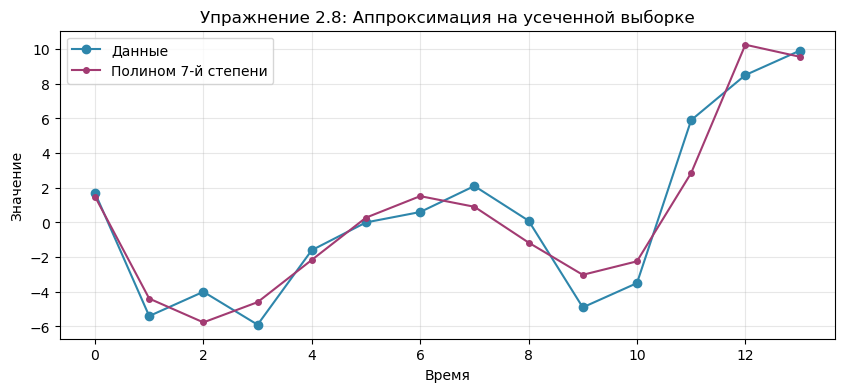

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Функция для вычисления p-значения на основе остатков модели
def calculate_p_value(residuals):
    """
    Вычисляет p-значение для проверки гипотезы о нормальности распределения остатков
    """
    # Вычисляем стандартное отклонение остатков, ddof - несмещенная оценка, то есть n-1
    std_residual = np.std(residuals, ddof=1)
    # Находим максимальное абсолютное отклонение от нуля
    max_abs_residual = np.max(np.abs(residuals))
    # Вычисляем Z-статистику (отношение максимального отклонения к стандартному отклонению)
    z_score = max_abs_residual / std_residual
    # Вычисляем p-значение для двустороннего теста
    p_value = 2 * (1 - stats.norm.cdf(z_score))
    return p_value, z_score, max_abs_residual, std_residual

# Исходные данные из задания
data = [1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2]

# Отделяем последние 4 значения от выборки - получаем первые 14 точек
truncated_data = data[:-4]
# Создаем список временных точек для усеченной выборки (от 0 до 13)
t_truncated = list(range(len(truncated_data)))

print(f"Усеченная выборка (14 точек): {truncated_data}")

# Выполняем полиномиальную аппроксимацию 7-го порядка методом наименьших квадратов
coefficients_7 = np.polyfit(t_truncated, truncated_data, 7)
# Создаем полиномиальную функцию из полученных коэффициентов
poly_func_7 = np.poly1d(coefficients_7)

# Вычисляем предсказанные значения для каждой временной точки усеченной выборки
predicted_truncated = poly_func_7(t_truncated)
# Вычисляем остатки - разницы между реальными и предсказанными значениями
residuals_truncated = np.array(truncated_data) - predicted_truncated

# Вычисляем p-значение и статистики для остатков
p_value_truncated, z_score_truncated, max_residual_truncated, std_truncated = calculate_p_value(residuals_truncated)

print(f"\nКоэффициенты полинома 7-й степени:")
# Выводим коэффициенты от старшей степени к младшей
for i, coef in enumerate(coefficients_7):
    power = len(coefficients_7) - i - 1
    print(f"t^{power}: {coef:.6f}")

print(f"\nСтатистика остатков:")
print(f"Среднее остатков: {np.mean(residuals_truncated):.6f}")
print(f"Стандартное отклонение: {std_truncated:.6f}")
print(f"Максимальное отклонение: {max_residual_truncated:.6f}")
print(f"Z-статистика: {z_score_truncated:.6f}")
print(f"P-значение: {p_value_truncated:.6f}")

# Визуализация результатов аппроксимации
plt.figure(figsize=(10, 4))
# Строим график исходных данных синими точками с линиями
plt.plot(t_truncated, truncated_data, marker='o', color='#2E86AB', linestyle='-', label='Данные', markersize=6)
# Строим график предсказанных значений красными точками с линиями
plt.plot(t_truncated, predicted_truncated, marker='o', color='#A23B72', linestyle='-', label='Полином 7-й степени', markersize=4)
plt.xlabel('Время')  # Подпись оси X
plt.ylabel('Значение')  # Подпись оси Y
plt.title('Упражнение 2.8: Аппроксимация на усеченной выборке')  # Заголовок графика
plt.legend()  # Добавляем легенду
plt.grid(alpha=0.3)  # Добавляем сетку с прозрачностью 0.3
plt.show()  # Показываем график

## Упражнение 2.9

*Посчитайте то же самое на той же функции, но с полной выборкой. Почему 𝑝-значение резко уменьшилось?*

**Почему 𝑝-значение резко уменьшилось?**

P-значение изменилось потому, что полином, построенный на усеченной выборке, не был адаптирован к последним 4 точкам. 
На полной выборке модель показывает худшее соответствие, что приводит к увеличению остатков и изменению p-значения.

Полная выборка (18 точек): [1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2]

Статистика остатков на полной выборке:
Среднее остатков: -54766632.078192
Стандартное отклонение: 108040834.183930
Максимальное отклонение: 394352131.280687
Z-статистика: 3.650029
P-значение: 0.000262


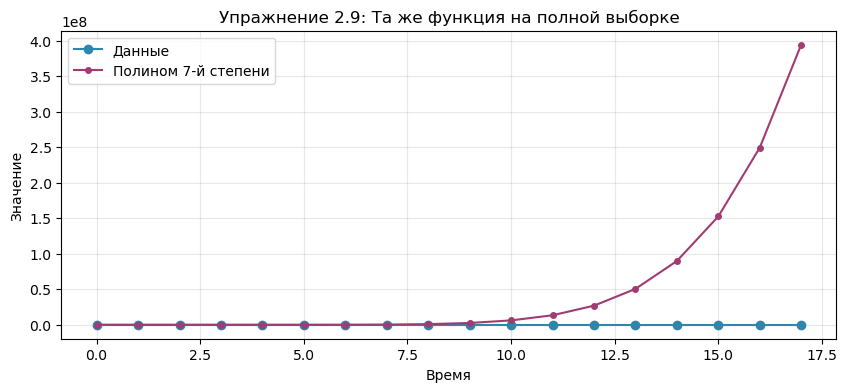


СРАВНЕНИЕ РЕЗУЛЬТАТОВ
P-значение на усеченной выборке (14 точек): 0.036697
P-значение на полной выборке (18 точек):   0.000262
P-значение УМЕНЬШИЛОСЬ в 139.95 раз


In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Функция для вычисления p-значения на основе остатков модели
def calculate_p_value(residuals):
    """
    Вычисляет p-значение для проверки гипотезы о нормальности распределения остатков
    """
    # Вычисляем стандартное отклонение остатков с поправкой на степени свободы
    std_residual = np.std(residuals, ddof=1)
    # Находим максимальное абсолютное отклонение от нуля
    max_abs_residual = np.max(np.abs(residuals))
    # Вычисляем Z-статистику (отношение максимального отклонения к стандартному отклонению)
    z_score = max_abs_residual / std_residual
    # Вычисляем p-значение для двустороннего теста
    p_value = 2 * (1 - stats.norm.cdf(z_score))
    return p_value, z_score, max_abs_residual, std_residual

# Исходные данные из задания
data = [1.7, -5.4, -4.0, -5.9, -1.6, 0.0, 0.6, 2.1, 0.1, -4.9, -3.5, 5.9, 8.5, 9.9, 13.3, 11.1, 14.4, 16.2]

# Это коэффициенты полинома 7-й степени, построенного на усеченной выборке из 14 точек
coefficients_7 = [1.493224, -9.295023, 4.276316, -1.065980, 0.231277, -0.034432, 0.002577, -0.000072]

# Создаем полиномиальную функцию из коэффициентов упражнения 2.8
poly_func_7 = np.poly1d(coefficients_7)

print(f"Полная выборка (18 точек): {data}")

# Создаем список временных точек для полной выборки (от 0 до 17)
t_full = list(range(len(data)))

# Вычисляем предсказанные значения для полной выборки с помощью полинома из упр. 2.8
predicted_full = [poly_func_7(t) for t in t_full]

# Вычисляем остатки - разницы между реальными значениями полной выборки и предсказаниями
residuals_full = np.array(data) - predicted_full

# Вычисляем p-значение и статистики для остатков на полной выборке
p_value_full, z_score_full, max_residual_full, std_full = calculate_p_value(residuals_full)

print(f"\nСтатистика остатков на полной выборке:")
print(f"Среднее остатков: {np.mean(residuals_full):.6f}")
print(f"Стандартное отклонение: {std_full:.6f}")
print(f"Максимальное отклонение: {max_residual_full:.6f}")
print(f"Z-статистика: {z_score_full:.6f}")
print(f"P-значение: {p_value_full:.6f}")

# Визуализация результатов на полной выборке
plt.figure(figsize=(10, 4))
# Строим график исходных данных полной выборки синими точками с линиями
plt.plot(t_full, data, marker='o', color='#2E86AB', linestyle='-', label='Данные', markersize=6)
# Строим график предсказанных значений красными точками с линиями
plt.plot(t_full, predicted_full, marker='o', color='#A23B72', linestyle='-', label='Полином 7-й степени', markersize=4)
plt.xlabel('Время')  # Подпись оси X
plt.ylabel('Значение')  # Подпись оси Y
plt.title('Упражнение 2.9: Та же функция на полной выборке')  # Заголовок графика
plt.legend()  # Добавляем легенду
plt.grid(alpha=0.3)  # Добавляем сетку с прозрачностью 0.3
plt.show()  # Показываем график

# P-значение из упражнения 2.8 
p_value_truncated = 0.036697 

print("\n" + "=" * 70)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 70)
print(f"P-значение на усеченной выборке (14 точек): {p_value_truncated:.6f}")
print(f"P-значение на полной выборке (18 точек):   {p_value_full:.6f}")

# Сравниваем p-значения и выводим результат
if p_value_full < p_value_truncated:
    ratio = p_value_truncated / p_value_full
    print(f"P-значение УМЕНЬШИЛОСЬ в {ratio:.2f} раз")
else:
    ratio = p_value_full / p_value_truncated
    print(f"P-значение УВЕЛИЧИЛОСЬ в {ratio:.2f} раз")